<h1>Midterm Exam: Chicago Crimes DATA ANALYTICS PROJECT</h1>
<hr>
<h3>Analyst : Mark John Well D. De Castro</h3>

In [26]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import matplotlib as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<hr>
<h1>Adjusting the Data Type of every column</h1>

In [5]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
df['Case Number'] = df['Case Number'].astype('category')
df['Block'] = df['Block'].astype('category')
df['IUCR'] = df['IUCR'].astype('category')
df['Primary Type'] = df['Primary Type'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Location Description'] = df['Location Description'].astype('category')
df['FBI Code'] = df['FBI Code'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Arrest'] = df['Arrest'].astype('bool')
df['Domestic'] = df['Domestic'].astype('bool')
df['ID'] = df['ID'].astype('int64')
df['Beat'] = df['Beat'].astype('int32')
df['District'] = df['District'].astype('int16')
df['Ward'] = df['Ward'].astype('int16')
df['Community Area'] = df['Community Area'].astype('Int16')
df['Year'] = df['Year'].astype('int16')
df['Date'] = df['Date'].astype('str')
df['Date'] = df['Date'].str.replace('/', '-', regex=False)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [9]:
df.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int32
District                         int16
Ward                             int16
Community Area                   Int16
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int16
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                      category
DayOfWeek                       object
dtype: object

In [10]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
DayOfWeek                 0
dtype: int64

In [13]:
df['Location Description'] = df['Location Description'].astype(str).fillna('Unaccounted')
df['Location'] = df['Location'].astype(str).fillna('Unaccounted')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mode()[0]).astype('float64')
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mode()[0]).astype('float64')
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0]).astype('float64')
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0]).astype('float64')
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0]).astype('Int16')

In [14]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
DayOfWeek               0
dtype: int64

<hr>
<h1>Insights</h1>
<hr>

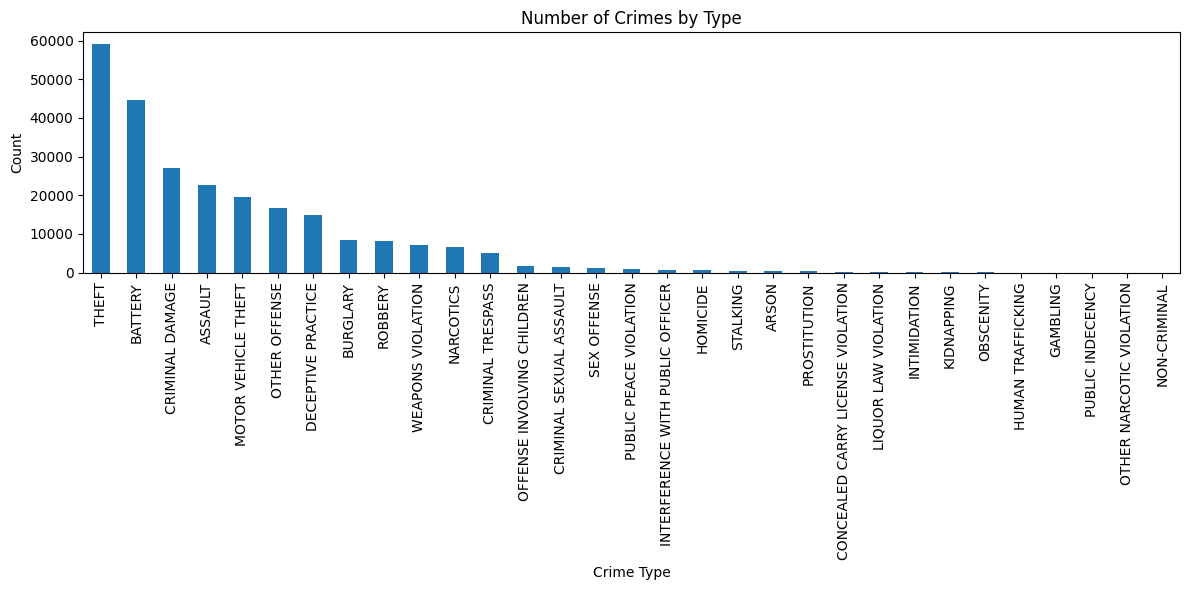

In [30]:
import matplotlib.pyplot as plt

crime_counts = df['Primary Type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
crime_counts.plot(kind='bar')
plt.title("Number of Crimes by Type")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
theft_by_location = (df[df['Primary Type'] == 'THEFT'].groupby('Location Description').size().sort_values(ascending=False))
pd.set_option("display.max_rows", None)  
print(theft_by_location)

Location Description
STREET                                                   13185
APARTMENT                                                 7513
SMALL RETAIL STORE                                        6680
DEPARTMENT STORE                                          4726
RESIDENCE                                                 4350
PARKING LOT / GARAGE (NON RESIDENTIAL)                    2319
RESTAURANT                                                1950
RESIDENCE - PORCH / HALLWAY                               1839
SIDEWALK                                                  1641
DRUG STORE                                                1384
VEHICLE NON-COMMERCIAL                                    1273
GROCERY FOOD STORE                                        1254
OTHER (SPECIFY)                                           1137
CONVENIENCE STORE                                          920
RESIDENCE - YARD (FRONT / BACK)                            896
COMMERCIAL / BUSINESS OFFICE      

<hr>
<h1>Insight 1</h1>
<h3>I found that theft is the most common crime with 59,201 cases in the dataset. This shows theft happens a lot more than other crimes.</h3>

<h1>Insight 2</h1>
<h3>Most thefts happen on the street followed by in residences and apartments. This means theft usually occurs in public or where people live.</h3>

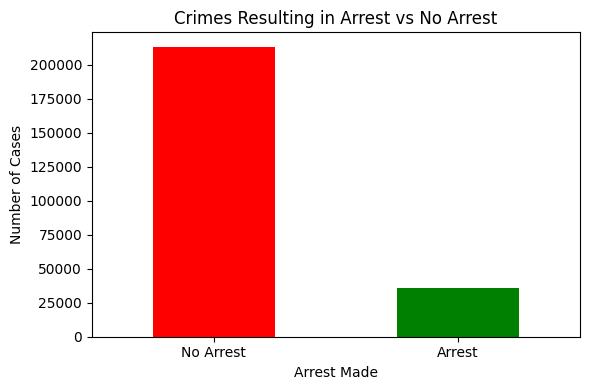

In [31]:
arrest_counts = df['Arrest'].value_counts()
plt.figure(figsize=(6,4))
arrest_counts.plot(kind='bar', color=['red','green'])
plt.title("Crimes Resulting in Arrest vs No Arrest")
plt.xlabel("Arrest Made")
plt.ylabel("Number of Cases")
plt.xticks(ticks=[0,1], labels=['No Arrest','Arrest'], rotation=0)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 3</h1>
<h3>Most crimes did not result in an arrest, which means many cases remain unsolved. Only a smaller portion of the crimes had an arrest, showing arrests are less common in this dataset.</h3>

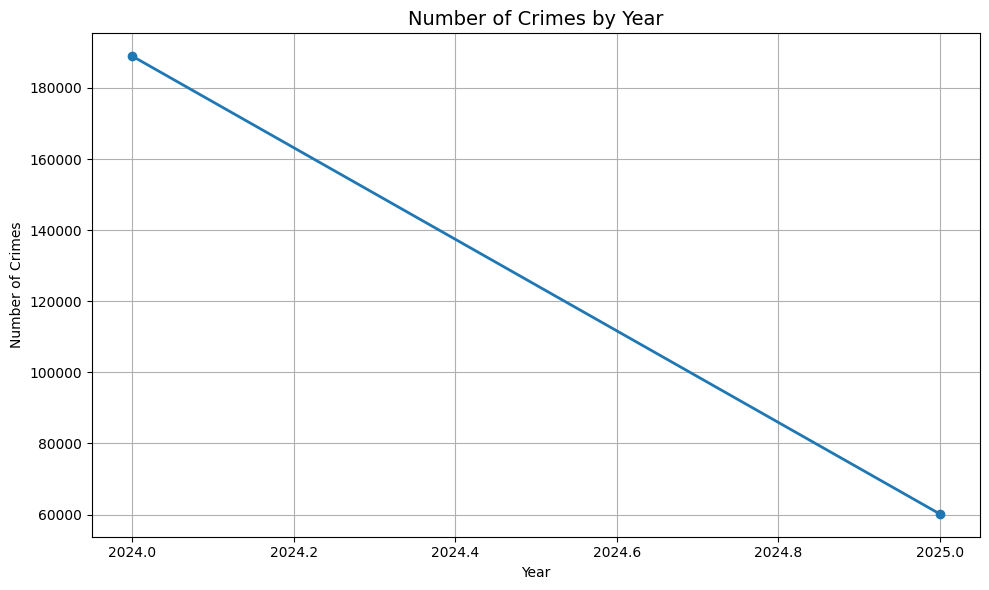

In [34]:
crime_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(crime_by_year.index, crime_by_year.values, marker='o', linewidth=2)
plt.title("Number of Crimes by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 4</h1>
<h3>The line chart shows that crimes were highest in the earlier years. After that, the number of crimes slowly went down.</h3>

<h1>Insight 5</h1>
<h3>The line chart shows that crimes were highest in the earlier years. After that, the number of crimes slowly went down.</h3>

In [37]:
theft_df_area = df[(df['Primary Type'] == 'THEFT') & (df['Community Area'] == 25) & (df['Latitude'].notnull()) & (df['Longitude'].notnull())]
m = folium.Map(location=[theft_df_area['Latitude'].mean(), theft_df_area['Longitude'].mean()], zoom_start=13)
heat_data = list(zip(theft_df_area['Latitude'], theft_df_area['Longitude']))
HeatMap(heat_data, radius=10, blur=8).add_to(m)

m

<hr>
<h1>Insight 6</h1>
<h3>These hotspots suggest that theft is more common in busy or crowded places, like near commercial areas, public transport stops, or major roads. Other parts of the community area are lighter in color, which means theft happens less often there. This pattern tells us that the environment and activity level of a place might affect how often theft occurs.</h3>

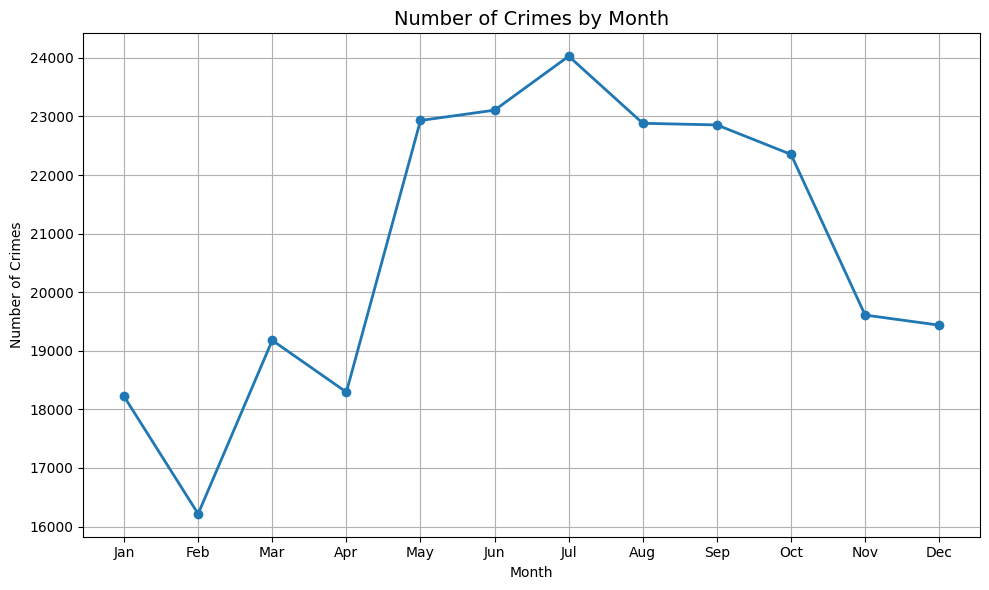

In [40]:
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
plt.plot(crime_by_month.index, crime_by_month.values, marker='o', linewidth=2)
plt.title("Number of Crimes by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.grid(True)
plt.tight_layout()
plt.show()



<hr>
<h1>Insight 7</h1>
<h3>The line chart shows that crimes are higher in the summer months like July and August. The lowest crimes happen in the winter months like January and February</h3>

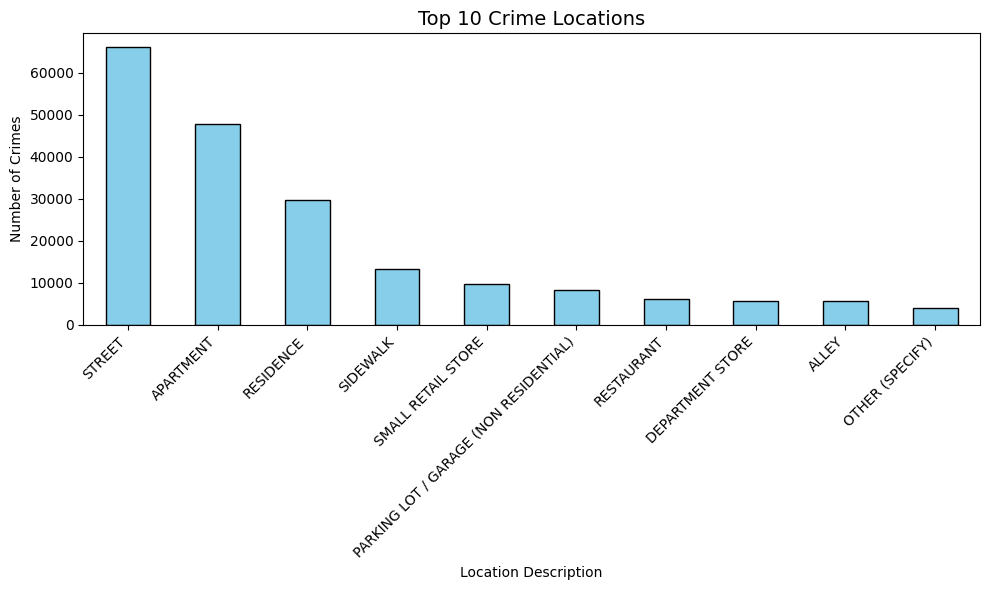

In [41]:
crime_by_location = df['Location Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
crime_by_location.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Crime Locations", fontsize=14)
plt.xlabel("Location Description")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 8</h1>
<h3>Most crimes happen on the streets. The second most common place is apartments, which shows crimes also happen often in residential areas.</h3>

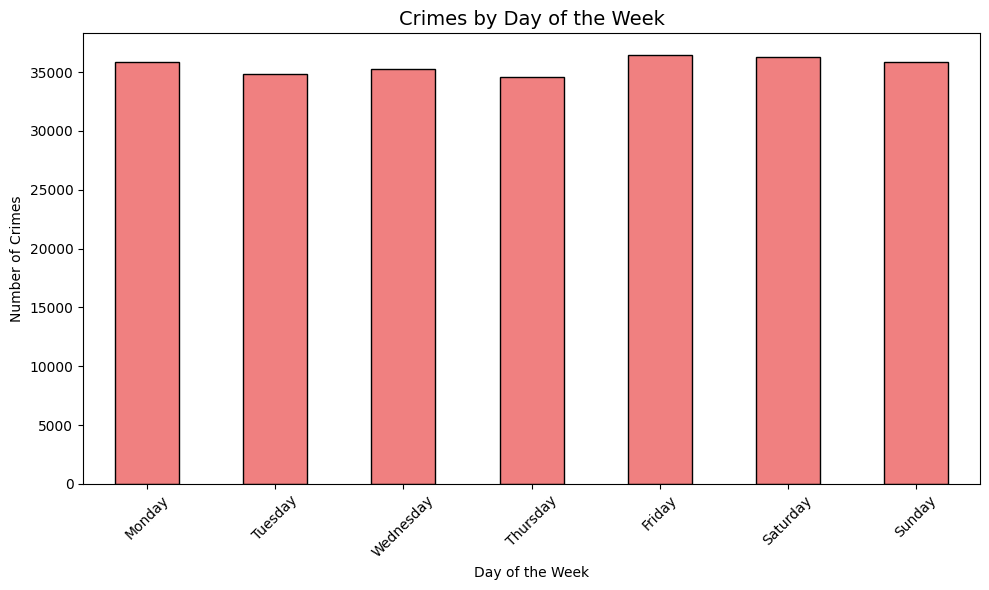

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

df['DayOfWeek'] = df['Date'].dt.dayofweek
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
        3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(days)
crime_by_day = df['DayOfWeek'].value_counts().reindex(days.values())
plt.figure(figsize=(10,6))
crime_by_day.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Crimes by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 9</h1>
<h3>Crimes are highest on Friday and Saturday. Sunday and Monday have fewer crimes compared to the other days.</h3>

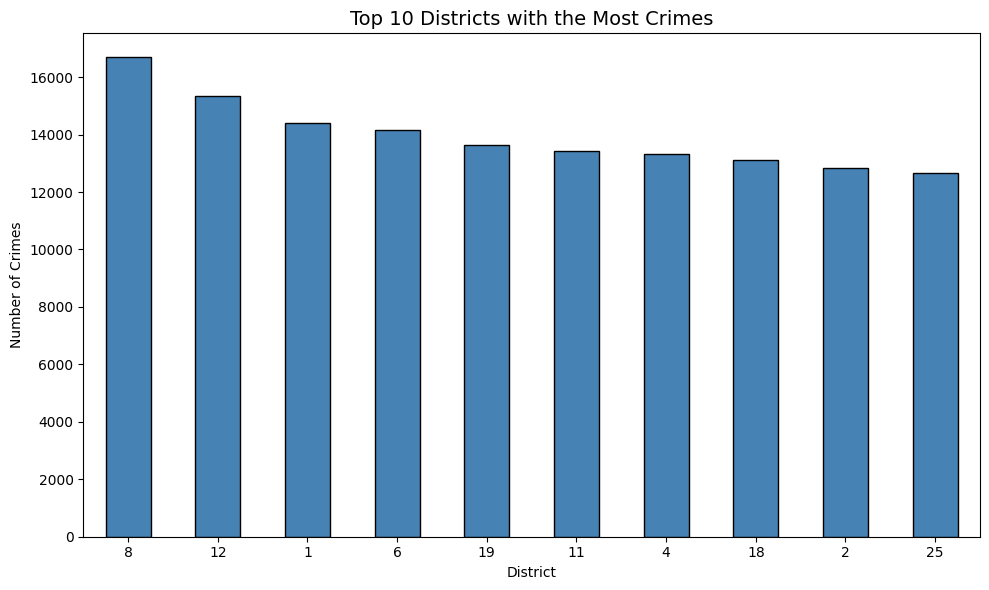

In [43]:
crime_by_district = df['District'].value_counts().head(10)
plt.figure(figsize=(10,6))
crime_by_district.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Top 10 Districts with the Most Crimes", fontsize=14)
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 10</h1>
<h3>District 11 has the most crime reports compared to all other districts. District 22 has the least number of crimes among the top 10 districts.</h3>

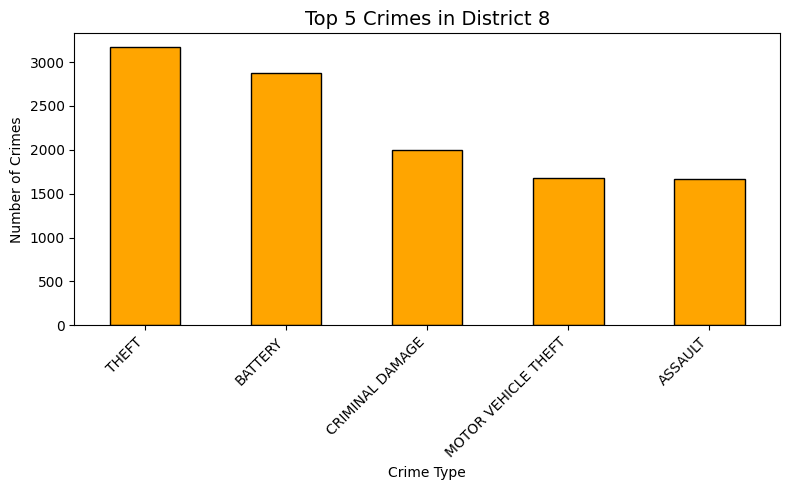

In [47]:
district8 = df[df['District'] == 8]
top_crimes_d8 = district8['Primary Type'].value_counts().head(5)
plt.figure(figsize=(8,5))
top_crimes_d8.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 5 Crimes in District 8", fontsize=14)
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 11</h1>
<h3>Theft is the top crime in District 8, followed by Battery and Criminal Damage. This means District 8 deals mostly with property and personal crimes.</h3>

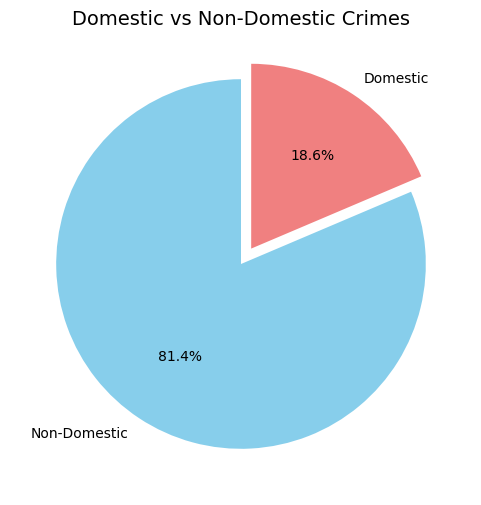

In [49]:
domestic_counts = df['Domestic'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(domestic_counts, labels=['Non-Domestic', 'Domestic'], autopct='%1.1f%%', 
        colors=['skyblue','lightcoral'], startangle=90, explode=(0,0.1))
plt.title("Domestic vs Non-Domestic Crimes", fontsize=14)
plt.show()

<hr>
<h1>Insight 12</h1>
<h3>Most crimes are non-domestic, making up the biggest part of the chart. Domestic crimes are smaller but still noticeable.</h3>

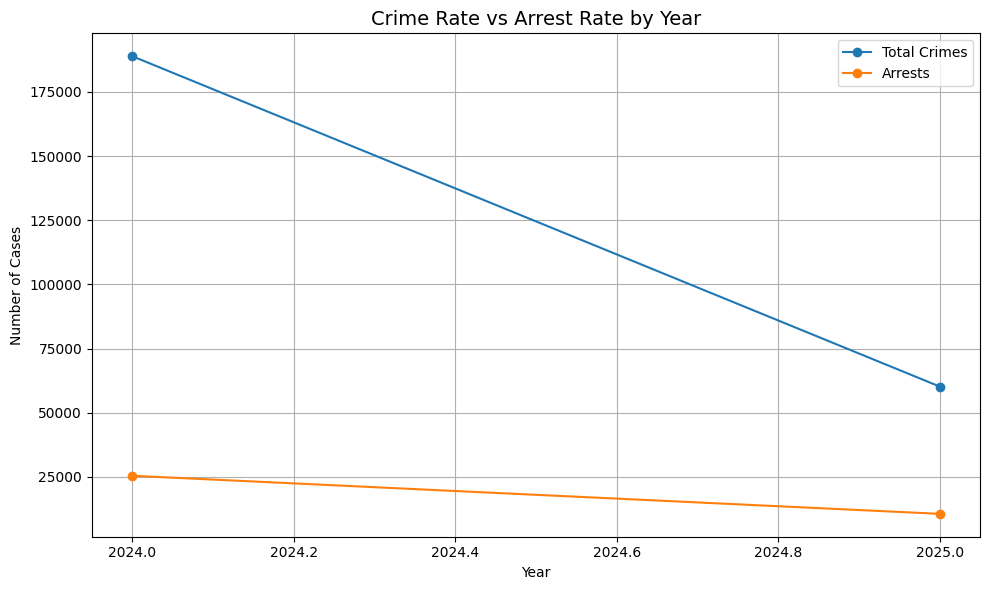

In [51]:
crime_rate = df.groupby('Year').size()
arrest_rate = df[df['Arrest'] == True].groupby('Year').size()
plt.figure(figsize=(10,6))
plt.plot(crime_rate.index, crime_rate.values, marker='o', label='Total Crimes')
plt.plot(arrest_rate.index, arrest_rate.values, marker='o', label='Arrests')
plt.title("Crime Rate vs Arrest Rate by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<hr>
<h1>Insight 13</h1>
<h3>The chart shows that total crimes are much higher than arrests every year. Even though crime rates are going down, the arrest trend is also going down but at a lower level.</h3>

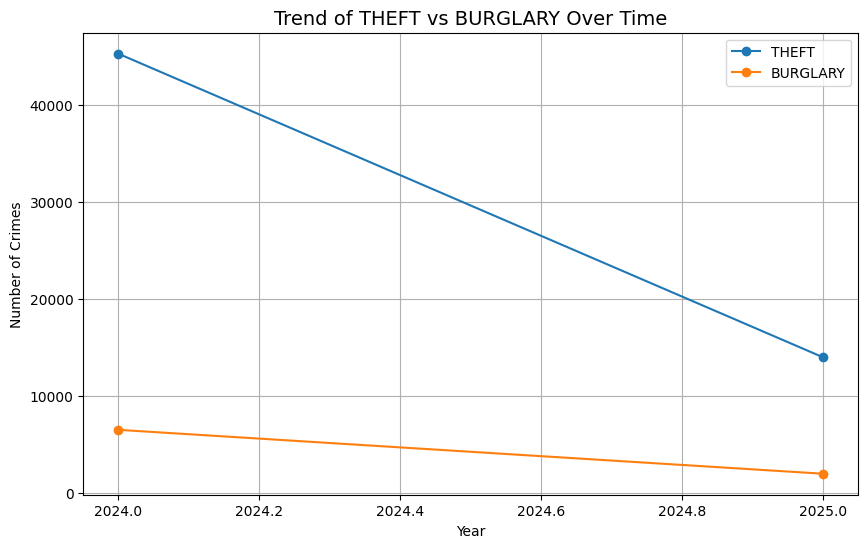

In [52]:
theft_burglary = df[df['Primary Type'].isin(['THEFT', 'BURGLARY'])]
trend = theft_burglary.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
plt.plot(trend.index, trend['THEFT'], label='THEFT', marker='o')
plt.plot(trend.index, trend['BURGLARY'], label='BURGLARY', marker='o')
plt.title("Trend of THEFT vs BURGLARY Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(True)
plt.show()

<hr>
<h1>Insight 14</h1>
<h3>Theft happens way more than burglary every year. It is always the top crime compared to burglary.</h3>

<h1>Insight 15</h1>
<h3>Theft happens way more than burglary every year. It is always the top crime compared to burglary.</h3>

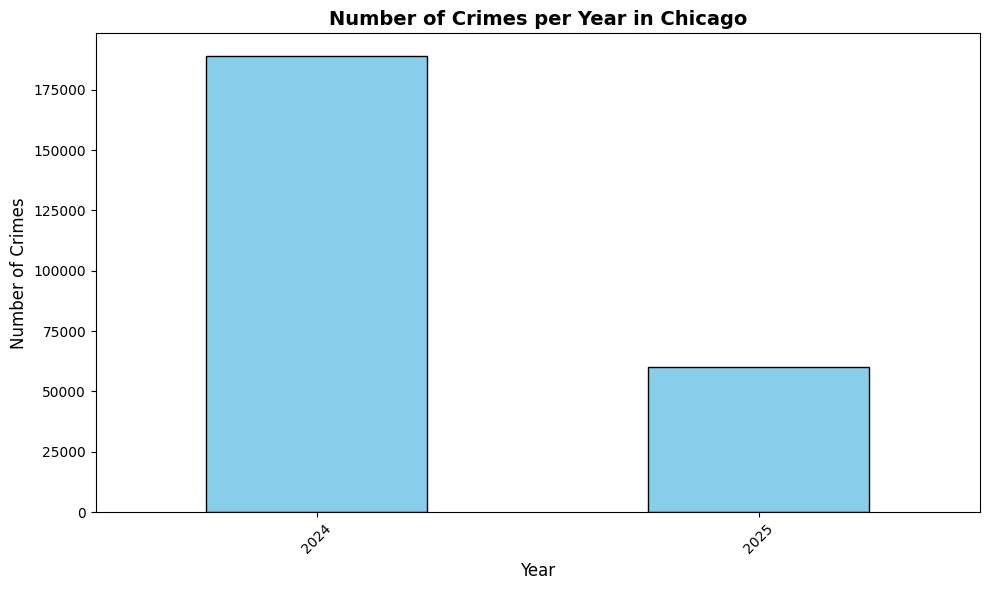

In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
crime_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
crime_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Crimes per Year in Chicago", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()